# Tutorial 2

In [1]:
# load Python packages
import numpy as np  # for numerical python libraries
import scipy.stats as st  # for statistical libraries
from scipy.special import gamma
import matplotlib.pyplot as plt  # for plotting
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Model Selection Criteria

For a model $M_j$, let $\ell_{j}$ be its log-likelihood, $\hat{\theta}_{j}$ its MLEs, and $d_{j}$ its number of free parameters. Suppose there is $n$ data points.

Several criteria we wish to otimize:

- AIC criterion, $\text{AIC}(M_j) = -\ell_{j}(\hat{\theta}_{j}) + d_j$
- BIC criterion, $\text{BIC}(M_j) = -\ell_{j}(\hat{\theta}_{j}) + \frac{1}{2}d_j \log(n)$

Other methods for model selection:

- Leave-one-out procedure
- Monte-Carlo cross-validation
- K-fold cross validation

## Cross-validation

We want to avoid overfitting the model to the training dataset. It offers a more general and versatile model.

A simple method consists of separating the dataset into training and testing parts. We then compute some performance criteria of interest and compare the models. Another example is the **leave-p-out** method:

```{r, eval=FALSE}
For all models:
    For each group of p observations:
        Train the model without those p observations
        Compute predicted values on those p observations
    end
    Calculate criteria of interest
end
Compare all models
```

## Performance metrics

There are some metrics that can be used to compare different classification models, often in cross-validation frameworks:

- Mean square error (MSE)
- Root mean square error (RMSE)
- Accuracy, overall performance of the model

$$
\frac{TP + TN}{TP + TN + FP + FN}
$$

- Precision, performance among positive outputs

$$
\frac{TP}{TP + FP}
$$

- Recall or sensitivity, performance among true positives

$$
\frac{TP}{TP + FN}
$$

- AUC, "Area under the ROC Curve"

#### Example: Classification with a Bayes KDE

In [2]:
def GenerateData(mus, sigmas, f, N):
    U = np.random.rand(N)
    X = (U<f)*np.random.normal(mus[0], sigmas[0], N) \
            + (U>=f)*np.random.normal(mus[1], sigmas[1], N)
    
    return X, (U<f)

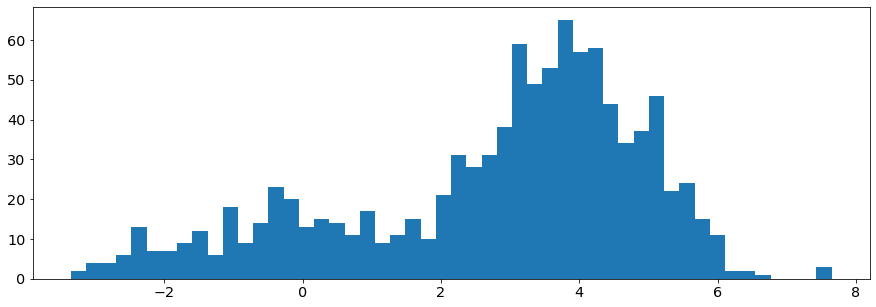

In [3]:
mus = [0.0, 4.0]
sigmas = [1.5, 1.1]
f = 0.3
Nsims = 1000

# obtain features and the original (true) labels
X, labels = GenerateData(mus, sigmas, f, Nsims)

# illustrate data
fix, axes = plt.subplots()
axes.hist(X, bins=50)
plt.show()

We use the library [scikit-learn](https://scikit-learn.org/stable/) to fit our KDE.

In [4]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X[:,None])

KernelDensity()

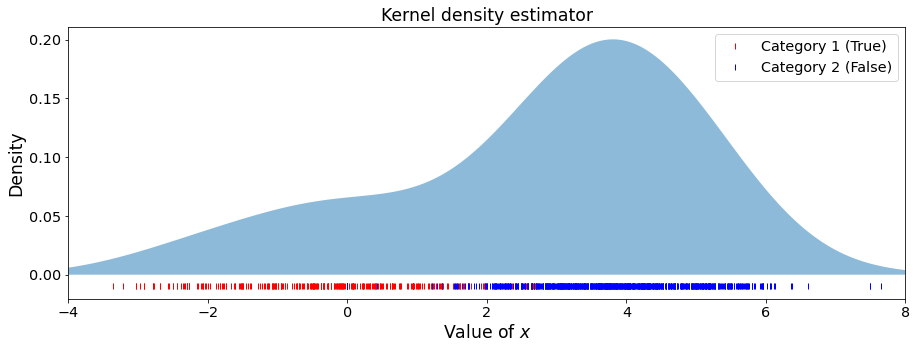

In [5]:
# score_samples returns the log of the probability density
bins = np.linspace(-4.0, 8, 1000)
logprob = kde.score_samples(bins[:,None])

# plot the kde with the observations and the true labels
fig, axes = plt.subplots()
axes.fill_between(bins, np.exp(logprob), alpha=0.5)
axes.plot(X*labels, -0.01*np.ones(Nsims), '|r', markeredgewidth=1)
axes.plot(X*~labels, -0.01*np.ones(Nsims), '|b', markeredgewidth=1)
axes.legend(["Category 1 (True)","Category 2 (False)"])
axes.set_title('Kernel density estimator')
axes.set_xlabel(r'Value of $x$')
axes.set_ylabel('Density')
axes.set_xlim(-4,8)
plt.show()

In [6]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
gaussian_nb =  GaussianNB()
gaussian_nb.fit(X[:,None], labels)

GaussianNB()

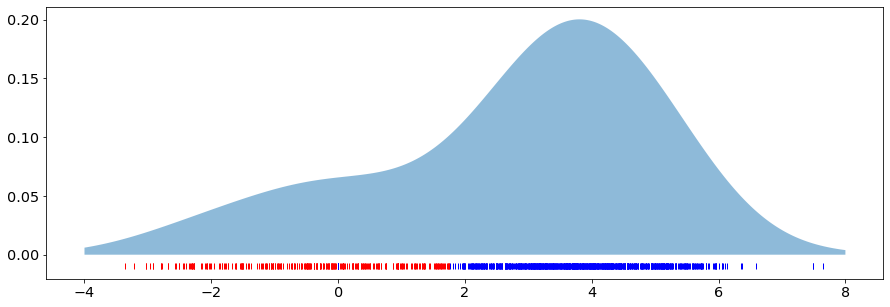

In [7]:
# compute the prediction from our Gaussian naive Bayes model
labels_preds = gaussian_nb.predict(X[:,None])

# plot the kde with the observations and the predicted labels
fig, axes = plt.subplots()
axes.fill_between(bins, np.exp(logprob), alpha=0.5)
axes.plot(X*labels_preds, -0.01*np.ones(Nsims), '|r', markeredgewidth=1)
axes.plot(X*~labels_preds, -0.01*np.ones(Nsims), '|b', markeredgewidth=1)
plt.show()

In [8]:
from sklearn.metrics import classification_report, accuracy_score

print('Training Accuracy : {:.3f}'.format(gaussian_nb.score(X[:, None], labels)))
print("Accuracy Score : {:.3f}".format(accuracy_score(labels, labels_preds)))
print("\nClassification Report :")
print(classification_report(labels, labels_preds))

Training Accuracy : 0.956
Accuracy Score : 0.956

Classification Report :
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       718
        True       0.95      0.89      0.92       282

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000

